<a href="https://colab.research.google.com/github/Abhay23bcs001/Data-leakage-detection/blob/main/Codesoft_task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings

In [2]:
intern_df = pd.read_csv('/content/creditcard.csv')

In [5]:
intern_df = intern_df.sample(n=50000, random_state=1, replace=True)

In [6]:
intern_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1061,805,-0.348790,0.942648,0.772145,-0.102838,0.041928,0.162930,-0.015540,0.514974,-0.372851,...,0.135842,0.352569,-0.050041,-0.723942,-0.367983,0.319538,-0.066893,-0.030732,8.90,0.0
235,156,-3.494861,-2.894450,1.637989,-0.274976,-0.389203,-0.703275,0.444194,0.154266,0.695818,...,0.017010,-0.063521,0.676254,0.596377,0.114229,0.834915,0.309675,0.632261,500.00,0.0
1096,845,0.975983,-0.923703,-0.018380,0.294127,-0.704140,0.016597,-0.245369,0.002482,-1.081399,...,-0.328057,-0.970821,-0.197510,-0.575731,0.378208,-0.446725,0.003171,0.045483,201.10,0.0
3839,3374,-0.304959,0.666321,0.565004,-2.474819,0.942675,-0.388364,1.080172,-0.240988,0.581760,...,0.029231,0.462957,-0.483303,-1.009373,0.243563,-0.774475,0.236952,-0.036437,1.00,0.0
905,681,1.120872,0.142425,0.782354,1.517495,-0.451665,-0.179163,-0.099553,0.011572,0.422085,...,-0.004126,0.292506,-0.059899,0.434357,0.636963,-0.263692,0.057531,0.023309,9.99,0.0
2763,2302,1.057596,-0.657281,0.938171,0.114893,-1.072729,0.147762,-0.690351,0.221577,1.005455,...,-0.165452,-0.422629,-0.030850,0.079956,0.115239,0.938962,-0.053052,0.012319,78.00,0.0
3717,3195,-2.119274,0.485760,1.687995,1.218300,-1.038468,0.391530,-0.360943,1.024454,-0.436940,...,0.160607,0.416763,0.219103,0.109325,0.286912,-0.235752,-0.067039,-0.327644,80.53,0.0
2895,2440,-1.312804,1.669903,0.912969,0.889439,-0.286737,-0.763205,0.531421,-0.930255,-0.481063,...,0.923671,0.386139,-0.073646,0.753070,-0.230089,-0.400181,-0.201132,-0.052964,38.19,0.0
960,726,-0.484766,0.871049,0.012455,-1.301366,2.523228,3.401660,0.341356,0.723835,-0.186282,...,-0.364792,-0.898622,-0.080780,0.979549,-0.009937,0.062785,0.213169,-0.051433,8.99,0.0
144,91,1.276134,0.211470,0.143001,0.370050,0.154748,-0.032255,-0.003030,-0.038887,0.030715,...,-0.279654,-0.747704,0.056808,-0.759464,0.271641,0.174757,-0.010770,0.008104,1.98,0.0


In [7]:
intern_df.shape

(50000, 31)

In [8]:
intern_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
intern_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3839,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
666,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
intern_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
intern_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,49983.000000,49983.000000,49983.000000,49983.000000,49983.000000,49983.000000,49983.000000,49983.000000
mean,1641.119840,-0.336112,0.305783,0.834337,0.021451,-0.030778,0.059071,0.156897,-0.070992,0.056157,...,0.011873,-0.085478,-0.056714,0.029241,0.092903,-0.012119,0.043786,0.001790,66.848146,0.000380
std,1012.212411,1.351181,1.183674,0.986827,1.419688,1.233863,1.300209,1.121455,1.324415,0.923571,...,0.887811,0.640433,0.400552,0.604887,0.406796,0.504150,0.355751,0.259881,224.528058,0.019493
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,758.000000,-1.030747,-0.158170,0.288187,-0.892458,-0.569463,-0.731799,-0.275423,-0.202917,-0.475676,...,-0.213609,-0.511575,-0.210826,-0.339166,-0.145909,-0.340564,-0.041350,-0.020678,2.280000,0.000000
50%,1527.000000,-0.452217,0.411374,0.889274,0.104137,-0.086645,-0.206446,0.171785,0.033160,0.030715,...,-0.054521,-0.066511,-0.068094,0.101686,0.105738,-0.025163,0.033619,0.021293,12.990000,0.000000
75%,2513.000000,1.069141,0.921588,1.425364,0.988402,0.396756,0.462649,0.639155,0.307650,0.620200,...,0.102347,0.340324,0.066026,0.437436,0.355043,0.288858,0.207653,0.087177,55.450000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [12]:
intern_df['Class'].value_counts()

,count
Class,
0.0,49964
1.0,19


In [13]:
intern_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1061 to 2262
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22  V

In [14]:
fraud=intern_df[intern_df['Class']==1]
genuine=intern_df[intern_df['Class']==0]
fraud.Amount.describe()

,Amount
count,19.000000
mean,250.578947
std,271.371274
min,0.000000
25%,0.000000
50%,0.000000
75%,529.000000
max,529.000000


In [15]:
genuine.Amount.describe()

,Amount
count,49964.000000
mean,66.778278
std,224.483066
min,0.000000
25%,2.280000
50%,12.990000
75%,55.450000
max,7712.430000


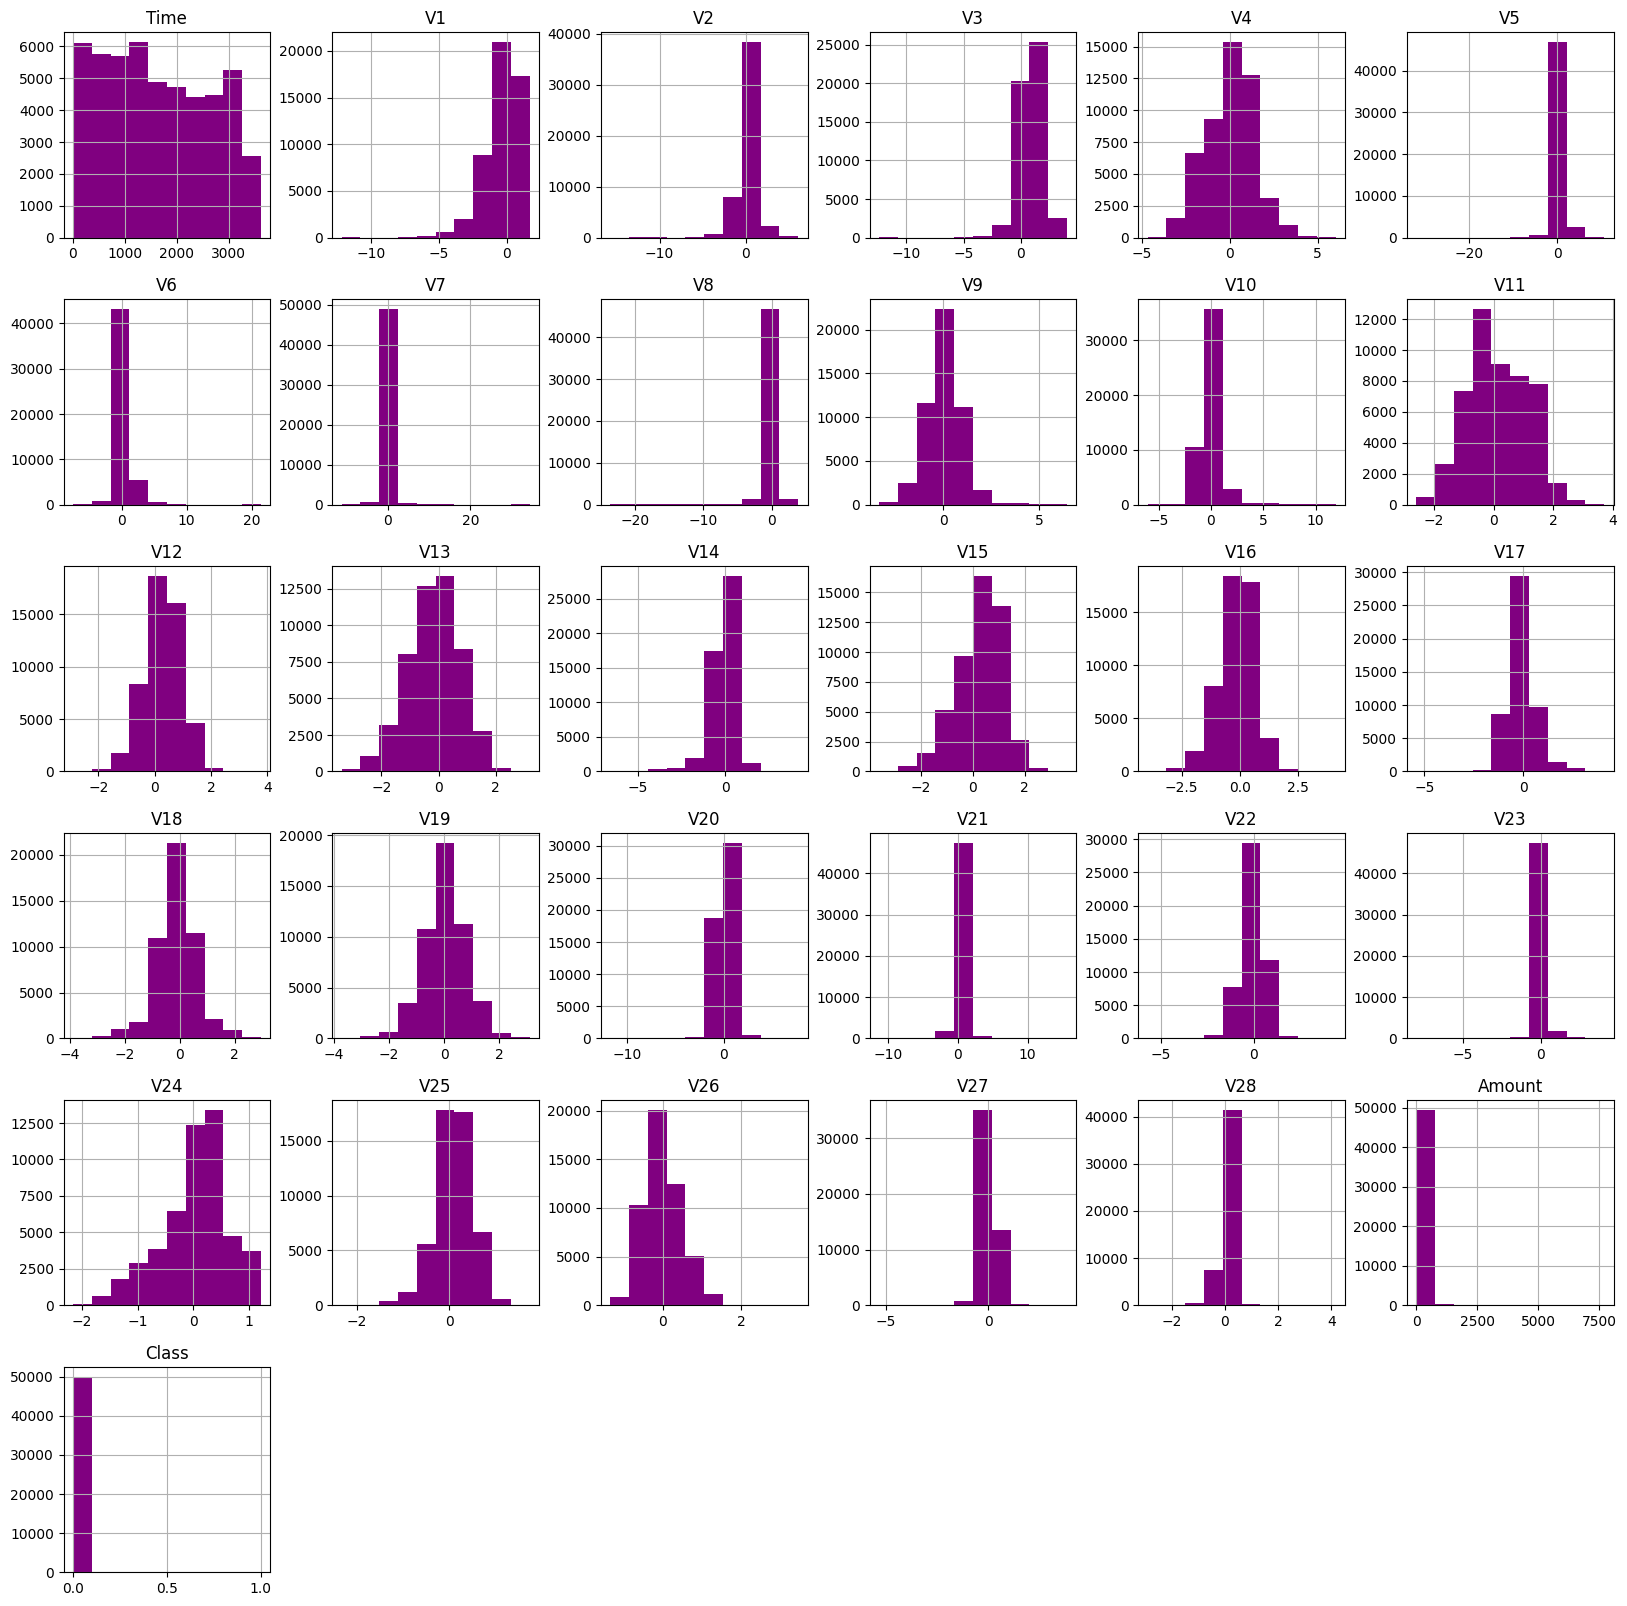

In [16]:
intern_df.hist(figsize=(20,20),color='Purple')
plt.show()

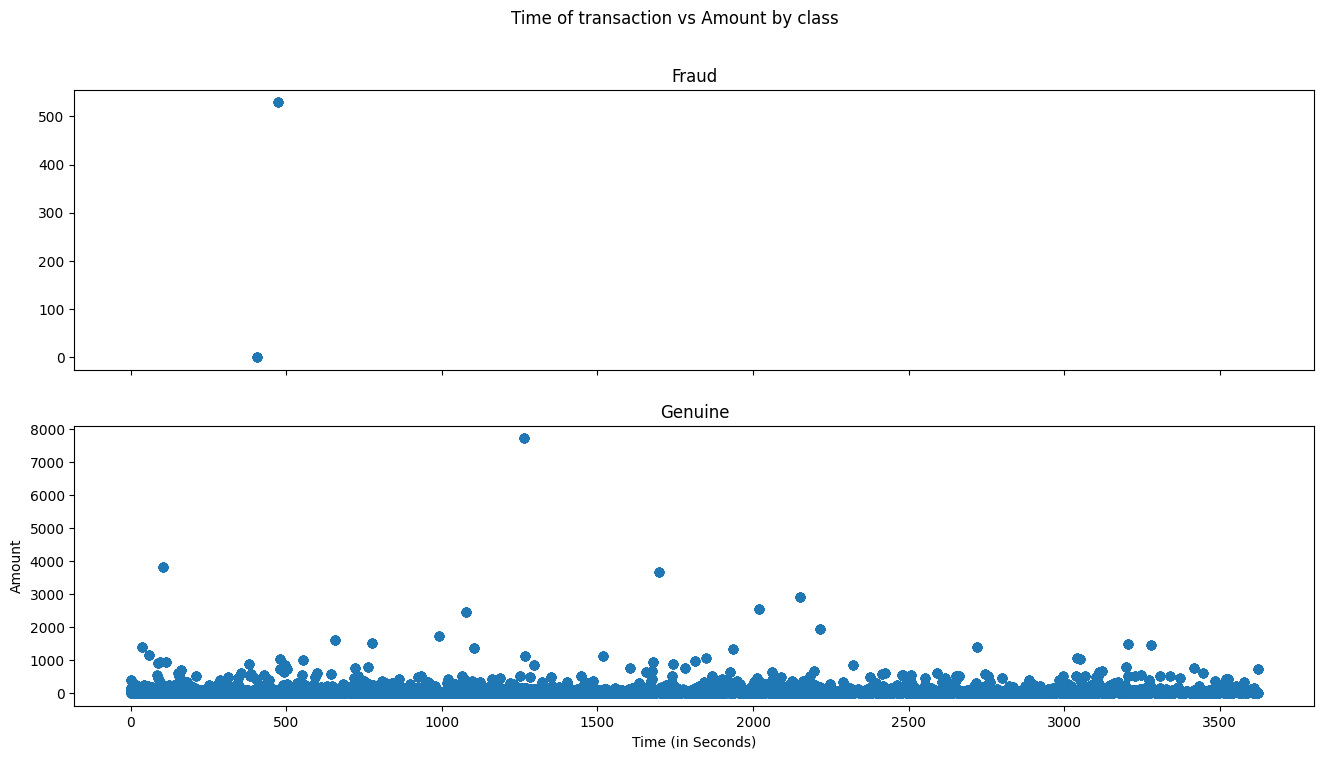

In [17]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()